<b>Nyquist-Shannon Sampling Theorem</b>
$$
f_s >2f_{max}
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

$$
x(t)=\cos(2\pi t)
$$

Plotando $x(t)$, cuja <b>frequência de oscilação</b> é de 1Hz

In [2]:
# 100 amostras igualmente espaçados no intervalo (0,1)
t = np.linspace(0,3,100)
x = np.cos(2*np.pi*t)

* Espaçamento entre amostras (sample spacing)
$$
\Delta t = \frac{T}{N-1} \quad \therefore \quad \Delta t = \frac{1}{33} \approx 0,03s
$$
* Frequência de amostragem (sample frequency)
$$
f_s = \frac{N-1}{T} \quad \therefore \quad \Delta t = \frac{33}{1} = 33 \text{Hz}
$$

> Isto é, há 33 amostras a cada segundo (sample frequency) e, consequentemente, uma amostra em aproxidamanete 0,03s

> Não confundir a frequência de oscilação do sinal senoidal, 1Hz, com a frequência de amostragem usada para construção do vetor dos instantes de tempo.

In [3]:
# Sample spacing
dt = t[1]-t[0]
dt

0.030303030303030304

(0.0, 1.0)

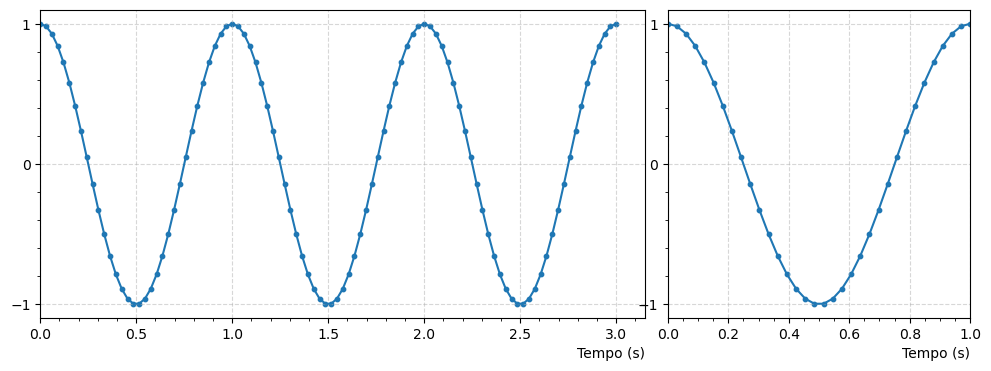

In [4]:
fig, axs = plt.subplots(1,2,figsize=(12,4),gridspec_kw={'width_ratios':[2,1],'wspace':0.05})

for ax in axs.flat:
    ax.plot(t,x)
    ax.scatter(t,x,s=10)
    ax.minorticks_on()
    ax.set_yticks([-1,0,1])
    ax.set_xlim(0,)
    ax.grid(alpha=0.5,ls='--')
    ax.set_xlabel('Tempo (s)',loc='right')

axs[1].set_xlim(0,1)

Amostrando $x(t)$ com um trem de impulsos de frequência 7Hz (7 amostras por segundo)

* Frequência de amostragem (sample frequency) do trem de impulsos

$$
f_s = \frac{N-1}{T} \quad \therefore \quad 7 = \frac{N-1}{3} \Rightarrow N=22
$$

In [5]:
# 22 amostras igualmente espaçados no intervalo (0,1)
t_p = np.linspace(0,3,22)

(0.0, 1.0)

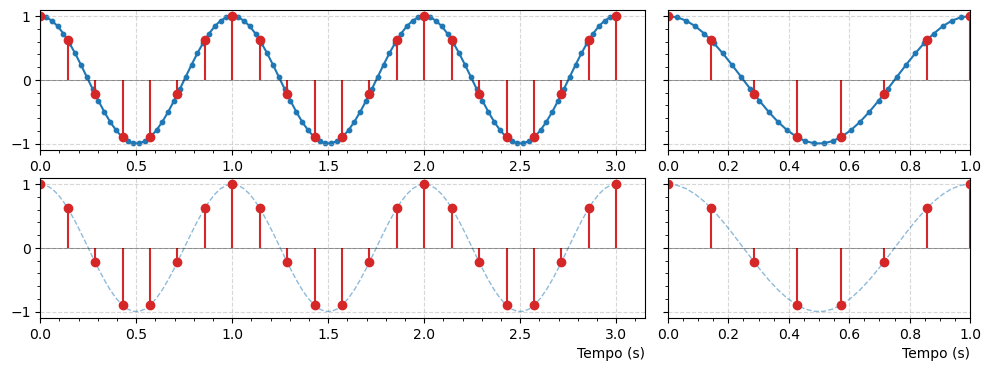

In [6]:
fig, axs = plt.subplots(2,2,figsize=(12,4),sharey=True,gridspec_kw={'width_ratios':[2,1],'wspace':0.05})

for i,ax in enumerate(axs.flat):
    
    if i//2==0:
        ax.plot(t,x)
        ax.stem(t_p,np.cos(2*np.pi*t_p),basefmt='None',linefmt='tab:red',markerfmt='tab:red')
        ax.scatter(t,x,s=10)
    else:
        ax.plot(t,x,alpha=0.5,lw=1,ls='--')
        ax.stem(t_p,np.cos(2*np.pi*t_p),basefmt='None',linefmt='tab:red',markerfmt='tab:red')
    ax.axhline(0,lw=0.5,c='k',alpha=0.5)
    ax.minorticks_on()
    ax.set_yticks([-1,0,1])
    ax.set_xlim(0,)
    ax.grid(alpha=0.5,ls='--')
    ax.set_xlabel('Tempo (s)',loc='right')

axs[0,1].set_xlim(0,1)
axs[1,1].set_xlim(0,1)

In [7]:
from ipywidgets import interact, widgets, fixed

In [8]:
t_s = np.linspace(0,3,1000)

In [17]:
def plot_signal(f_sinal,f_amostragem,t_s):
    
    t_p = np.linspace(0,3,int((3*f_amostragem)+1))     # Trem de impulsos
    
    plt.figure(figsize=(12,4))
    
    plt.stem(t_p,np.cos(2*np.pi*t_p),basefmt='None',linefmt='tab:red',markerfmt='tab:red')
    plt.plot(t_s,np.cos(2*np.pi*f_sinal*t_s))
    plt.axhline(0,lw=0.5,c='k',alpha=0.5)
    plt.xlim(0,3)
    plt.yticks([-1,0,1],['-1','0','1'])
    
    plt.minorticks_on()
    plt.grid(alpha=0.5,ls='--')
    plt.xlabel('Tempo (s)',loc='right')
    plt.suptitle(f'$\cos({round(2*f_sinal,2)} \pi t)$ amostrado por trem de impulsos de {round(f_amostragem,2)}Hz')
    plt.show()

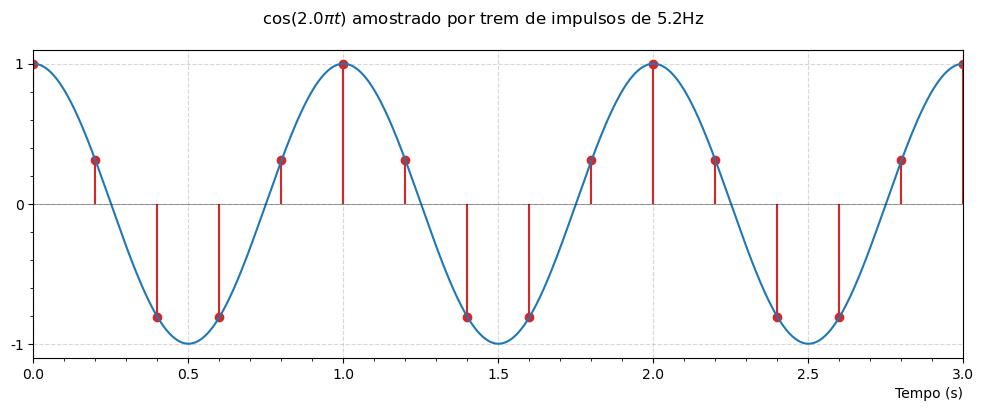

In [19]:
slider_freq_sinal     = widgets.FloatSlider(min=0.1, max=10, step=0.1, value=1.0,description='$f_x$')
slider_freq_amotragem = widgets.FloatSlider(min=0.1, max=20, step=0.1, value=1.0,description='$f_s$')

interact(plot_signal,f_sinal=slider_freq_sinal,f_amostragem = slider_freq_amotragem,t_s = fixed(t_s))